## **I. Introduction**

**Nama             :** Banyu Nurmanjaya

**URL Hugging Face :** https://huggingface.co/spaces/Banyuuu/language_detection/

### **I.II. Background**

Di era digital yang semakin terhubung, teks multibahasa tersebar luas di berbagai platform. Kemampuan untuk mengidentifikasikan bahasa secara otomatis merukapan langkah dalam pemrosesan bahasa alami (NPL), memungkinkan sistem menerapkan model spesifik bahasa yang tepat. Proyek ini bertujuan mengembangkan model ``deteksi bahasa otomatis`` menggunakan deep learning, memanfaatkan dataset yang mencakup 17 bahasa berbeda untuk menangani kompleksitas linguistik global.

### **I.III. Object**

Proyek ini bertujuan untuk membangun dan mengevaluasi model deep learning yang mampu secara akurat mendeteksi bahasa dari teks masukan. Model ini akan dilatih untuk mengidentifikasikan salah satu dari 17 bahasa (Inggris, Malayalam, Hindi, Tamil, Kannada, Prancis, Spanyol, Portugis, Italia, Rusia, Swedia, Belanda, Arab, Turki, Jerman, Denmark, Yunani) dan mencapai tingkat ``akurasi deteksi yang tinggi.``

## **II. Dataset**

**Judul:** Languange Detection

**Deskripsi:** Ini adalah kumpulan data deteksi bahasa yang kecil. Dataset ini terdiri dari detail teks untuk 17 bahasa yang berbeda, yaitu, Anda akan dapat membuat model NLP untuk memprediksi 17 bahasa yang berbeda ...


Bahasa :     

1) Bahasa Inggris<br>
2) Bahasa Malayam<br>
3) Bahasa Hindi<br>
4) Tamil<br>
5) Kannada<br>
6) Bahasa Prancis<br>
7) Bahasa Spanyol<br>
8) Portugis<br>
9) Bahasa Italia<br>
10) Rusia<br>
11) Bahasa Swedia<br>
12) Belanda<br>
13) Bahasa Arab<br>
14) Bahasa Turki<br>
15) Bahasa Jerman<br>
16) Denmark<br>
17) Bahasa Yunani


**Sumber:** https://www.kaggle.com/datasets/basilb2s/language-detection

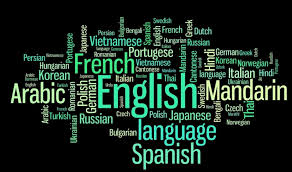

| Kolom | Deskripsi |
|---|---|
| Text | Kolom ini berisi `konten tekstual` yang menjadi input untuk model deteksi bahasa. Setiap baris dalam kolom ini merepresentasikan sebuah potongan teks atau kalimat yang bahasanya perlu diidentifikasi. |
| Languange | Kolom ini adalah `label target` atau `ground truth` yang menunjukkan bahasa dari teks yang sesuai di kolom `Text`. Untuk setiap entri teks, kolom ini secara eksplisit menyebutkan bahasa dari teks tersebut. |

In [1]:
import json
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import string


import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, HTML

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [69]:
import tensorflow as tf

print(tf.__version__)

2.18.0


## **IV. Data Loading**

In [4]:
try:
    df = pd.read_csv("automatic_language_detection.csv")
except FileNotFoundError:
    print("Error: File automatic_language_detection.csv not found.")
    exit()

In [10]:
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [12]:
df.tail(10)

,Text,Language
10327,ಗಾಡಿಯಲ್ಲಿ ಮನೆಯಲ್ಲಿ ನಾರ್ಸಿಸ್ ಅವಳು ಮನೆಗೆ ತಲುಪಿದಾ...,Kannada
10328,ಅವಳು ಮನೆಯಲ್ಲಿ ಕುಳಿತಿದ್ದ ತನ್ನ ತಾಯಿಯನ್ನು ತಬ್ಬಿಕೊ...,Kannada
10329,ಓಹ್ ತಾಯಿ ನಾನು ನಿನ್ನನ್ನು ತುಂಬಾ ಪ್ರೀತಿಸುತ್ತೇನೆ ಮ...,Kannada
10330,"ಅವನು ಸುಂದರವಾಗಿದ್ದನು, ಅವನು ನನ್ನ ಬಗ್ಗೆ ಅಷ್ಟಾಗಿ ಕ...",Kannada
10331,ಓಹ್ ಇಲ್ಲ ನೀವು ನೋಡಿದಾಗಿನಿಂದ ಇದು ಸರಿಯಾಗಿದೆ.,Kannada
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


## **V. Exploratory Data Analysis (EDA)**

In [13]:
df_eda = df.copy()

<ipython-input-14-6283d4a6293e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, ax=ax2, palette='viridis')


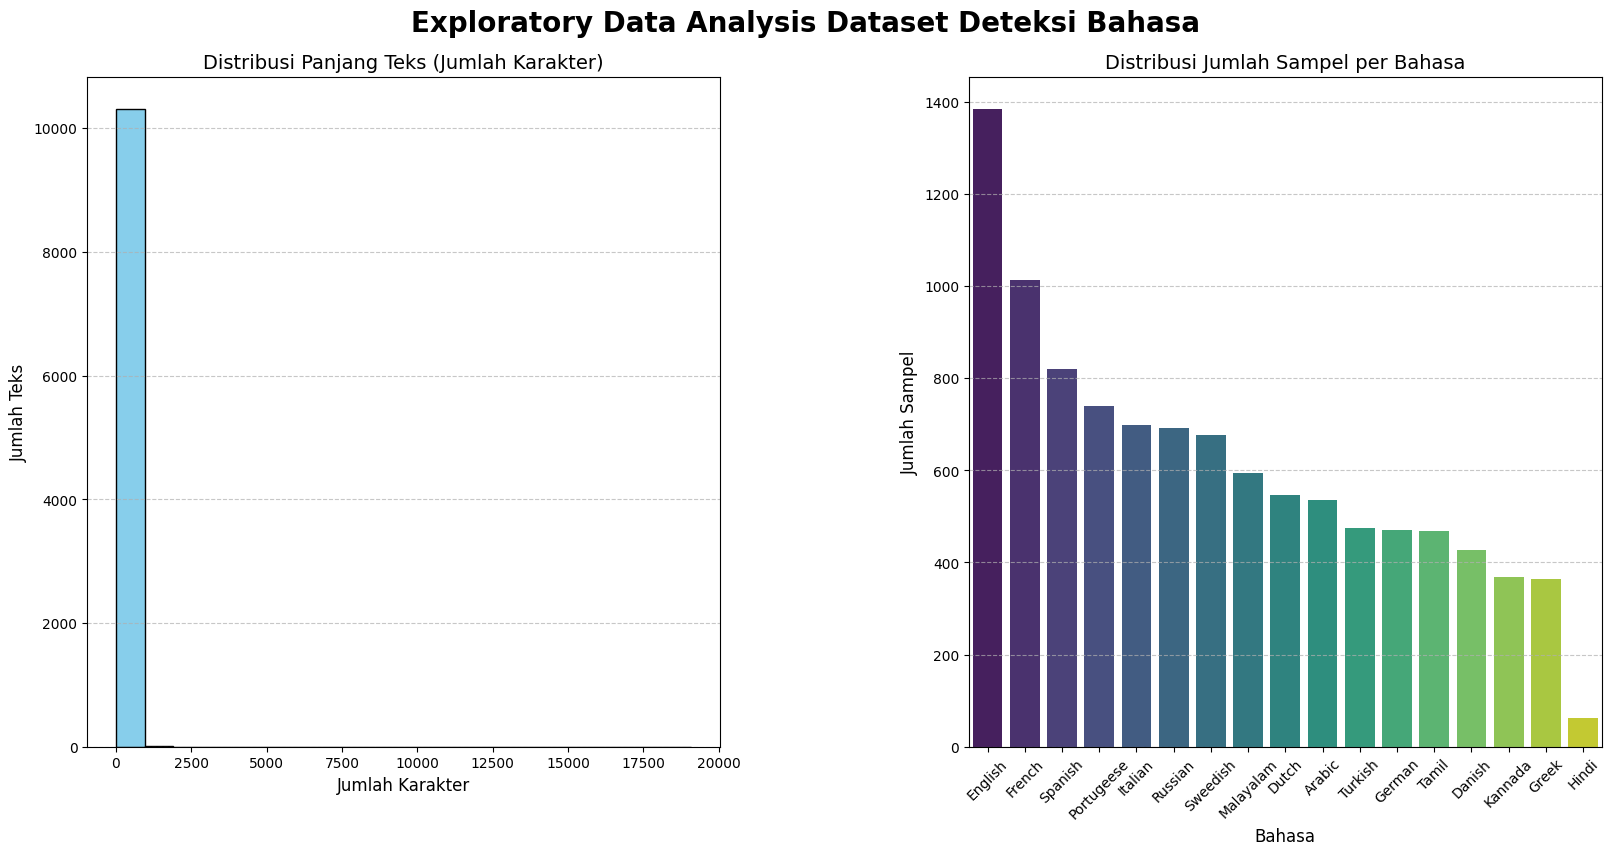


--- Statistik Deskriptif Panjang Teks ---
count    10337.000000
mean       124.055625
std        253.688194
min          1.000000
25%         43.000000
50%        100.000000
75%        166.000000
max      19088.000000
Name: text_length, dtype: float64

--- Jumlah Sampel per Bahasa ---
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64
Total sampel: 10337
Jumlah bahasa unik: 17


In [14]:
fig = plt.figure(constrained_layout=True, figsize=(16, 8))

gs = GridSpec(1, 2, figure=fig, hspace=0.3, wspace=0.2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

df_eda['text_length'] = df_eda['Text'].apply(len)

ax1.hist(df_eda['text_length'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Distribusi Panjang Teks (Jumlah Karakter)', fontsize=14)
ax1.set_xlabel('Jumlah Karakter', fontsize=12)
ax1.set_ylabel('Jumlah Teks', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

language_counts = df_eda['Language'].value_counts()

sns.barplot(x=language_counts.index, y=language_counts.values, ax=ax2, palette='viridis')
ax2.set_title('Distribusi Jumlah Sampel per Bahasa', fontsize=14)
ax2.set_xlabel('Bahasa', fontsize=12)
ax2.set_ylabel('Jumlah Sampel', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Exploratory Data Analysis Dataset Deteksi Bahasa', fontsize=20, fontweight='bold', y=1.05)

plt.show()

print("\n--- Statistik Deskriptif Panjang Teks ---")
print(df_eda['text_length'].describe())

print("\n--- Jumlah Sampel per Bahasa ---")
print(df_eda['Language'].value_counts())
print(f"Total sampel: {len(df_eda)}")
print(f"Jumlah bahasa unik: {df_eda['Language'].nunique()}")

**Insight:**

**Distribusi Panjang Teks (Jumlah Karakter)**
- Sebagian besar teks dalam dataset memiliki panjang karakter yang sangat pendek, yaitu di bawah ``2.500 karakter.`` Batang histogram tertinggi ``terkonsentrasi di rentang paling kiri.``

- Hampir ``tidak ada teks dengan panjang karatker di atas 2.500.`` Distribusi panjang teks sangat condong ke arah kiri (positively skewed).

- Karena mayoritas teks sangat pendek, model deteksi bahasa harus efektif dalam mengidentifikasi bahasa dari cuplikan teks yang ringkas. Model mungkin tidak banyak "belajar" dari konteks panjang kalimat/paragraf, dan ``akan lebih bergantung pada pola karakter, n-gram, atau short-phrase yang kuat.``

- ``Deviasi standar (std) sebesar 253.68 menunjukkan variasi yang sangat tinggi dalam panjang teks.`` Ini diperkuat oleh perbedaan besar antara mean dan median, serta nilai max yang sangat tinggi.

**Distribusi Jumlah Sampel per Bahasa**
- Bahasa Inggris memiliki jumlah sampel paling banyak (sekitar 1400 sampel), diikuti oleh Prancis dan Spanyol (sekitar 1000 dan 800 sampel). Ini menunjukkan bahwa ``model akan memiliki lebih banyak data untuk belajar mengidentifikasi bahasa-bahasa ini.``

- Bahasa seperti Hindi dan Kannada memiliki jumlah sampel yang ``jauh lebih sedikit (di bawah 400 sampel),`` bahkan paling sedikit.

- ``Model mungkin cenderung overfit atau bias`` terhadap bahasa-bahasa dengan sampel lebih banyak (Inggris, Prancis, Spanyol).

- Akurasi model dalam mendeteksi bahasa dengan sampel sedikit (Hindi, Kannada, Denmark, Yunani, dll.) kemungkinan akan lebih rendah. ``Model mungkin kesulitan mempelajarin fitur`` yang cukup untuk membedakan bahasa-bahasa ini secara efektif.

- Dataset ini memang mencakup 17 bahasa unik seperti yang disebutkan sebelumnya.

## **VI. Feature Engineer**

In [5]:
df_en = df.copy()

### **VI.I. Encode Label**

In [6]:
label_encoder = LabelEncoder()
df_en['label'] = label_encoder.fit_transform(df_en['Language'])

In [18]:
X_raw = df_en['Text']
y = df_en['label']

### **VI.II. Split Data**

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_raw, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val)

print("Train size :", X_train.shape)
print("Val size   :", X_val.shape)
print("Test size  :", X_test.shape)


Train size : (7468,)
Val size   : (1318,)
Test size  : (1551,)


### **VI.III. Calculated class weight**

In [22]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

### **VI.IV. Preprocessing for Word-level (LSTM/GRU)**

In [23]:
stopword_list = list(set(stopwords.words('english')))
lemmatizer = WordNetLemmatizer()

def preprocess_word_level(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stopword_list]
    return ' '.join(words)

X_train_word = X_train.apply(preprocess_word_level)
X_val_word = X_val.apply(preprocess_word_level)
X_test_word = X_test.apply(preprocess_word_level)


### **VI.V. Tokenize Word-level (LSTM/GRU)**

In [24]:
tokenizer_word = Tokenizer(oov_token="<OOV>")
tokenizer_word.fit_on_texts(X_train_word)

maxlen_word = 100

X_train_seq_word = pad_sequences(tokenizer_word.texts_to_sequences(X_train_word), maxlen=maxlen_word, padding='post')
X_val_seq_word = pad_sequences(tokenizer_word.texts_to_sequences(X_val_word), maxlen=maxlen_word, padding='post')
X_test_seq_word = pad_sequences(tokenizer_word.texts_to_sequences(X_test_word), maxlen=maxlen_word, padding='post')


### **VI.VI. Tokenize Char-level (CNN)**

In [25]:
tokenizer_char = Tokenizer(char_level=True, oov_token="<OOV>")
tokenizer_char.fit_on_texts(X_train)

maxlen_char = 300

X_train_seq_char = pad_sequences(tokenizer_char.texts_to_sequences(X_train), maxlen=maxlen_char, padding='post')
X_val_seq_char = pad_sequences(tokenizer_char.texts_to_sequences(X_val), maxlen=maxlen_char, padding='post')
X_test_seq_char = pad_sequences(tokenizer_char.texts_to_sequences(X_test), maxlen=maxlen_char, padding='post')


In [26]:
y = to_categorical(df_en['label'])

## **VII. ANN Training**

### **VII.I. Model Training**

In [64]:
max_sen_len = max([len(i.split(" ")) for i in X_train])
text_vectorization = TextVectorization(
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=max_sen_len
)

text_vectorization.adapt(X_train)

X_train_vec = text_vectorization(np.array([[s] for s in X_train])).numpy()
X_val_vec = text_vectorization(np.array([[s] for s in X_val])).numpy()
X_test_vec = text_vectorization(np.array([[s] for s in X_test])).numpy()

vocab = text_vectorization.get_vocabulary()
total_vocab = len(vocab)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [43]:
%%time

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

vocab_size = total_vocab
embedding_dim = 128
max_length = max_sen_len

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(17, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_vec, y_train_encoded,
               validation_data=(X_val_vec, y_val_encoded),
               epochs=20,
               batch_size=32,
               callbacks=[early_stop],
               class_weight=class_weights_dict)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1797s 8s/step - accuracy: 0.0552 - loss: 2.8556 - val_accuracy: 0.0455 - val_loss: 2.8337
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1828s 8s/step - accuracy: 0.0482 - loss: 2.8534 - val_accuracy: 0.1343 - val_loss: 2.8314
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1820s 8s/step - accuracy: 0.0538 - loss: 2.8523 - val_accuracy: 0.0713 - val_loss: 2.8335
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1782s 8s/step - accuracy: 0.0607 - loss: 2.8509 - val_accuracy: 0.0417 - val_loss: 2.8378
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1739s 7s/step - accuracy: 0.0499 - loss: 2.8520 - val_accuracy: 0.0577 - val_loss: 2.8312
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1739s 7s/step - accuracy: 0.0530 - loss: 2.8520 - val_accuracy: 0.0713 - val_loss: 2.8285
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1762s 7s/step - accuracy: 0.0499 - loss: 2.8519 - val_accuracy: 0.0455 - val_loss: 2.8339
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1783s 8s/step - accuracy: 0.0575 - loss: 2.8516 - 

### **VII.II. Model Evaluation**

49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step

 ---------- Classification Report Model LSTM ---------- 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.00      0.00      0.00        64
           2       0.00      0.00      0.00        82
           3       0.00      0.00      0.00       208
           4       0.00      0.00      0.00       152
           5       0.00      0.00      0.00        71
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        89
          11       0.07      1.00      0.13       111
          12       0.00      0.00      0.00       104
          13       0.00      0.00      0.00       123
          14       0.00      0.00      0.00       101
          15       0.00      0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


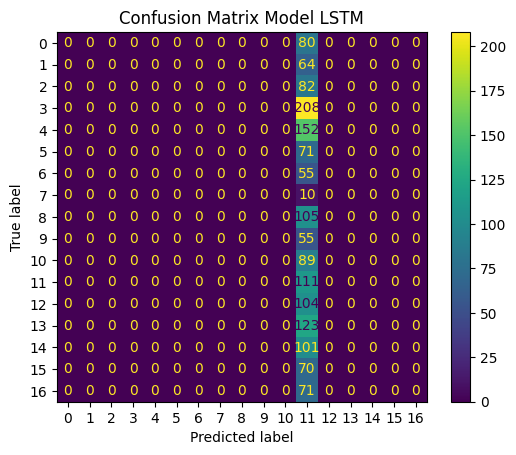

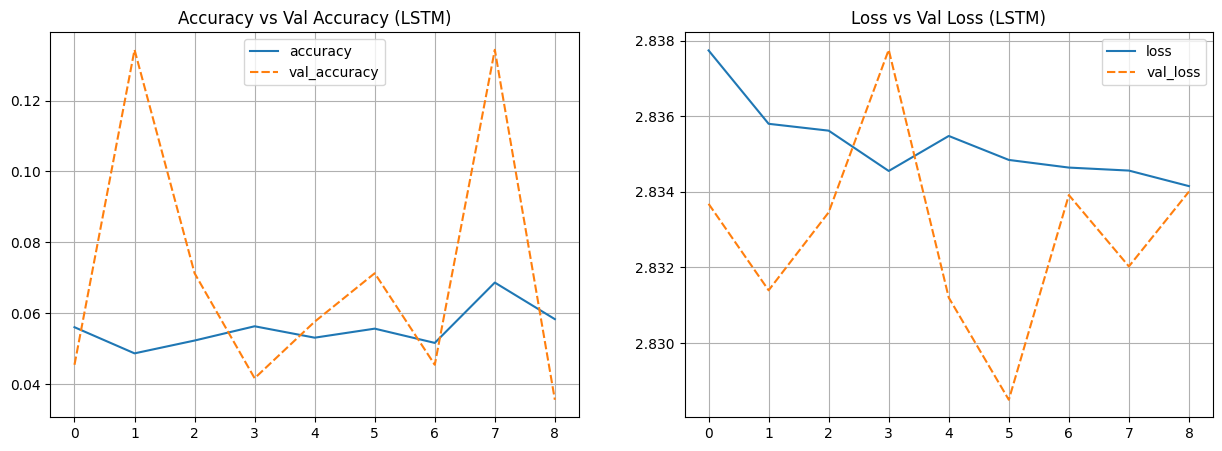

In [48]:
y_pred_lstm = np.argmax(model_lstm.predict(X_test_vec), axis=1)

y_test_encoded = to_categorical(y_test, num_classes=17)

print('\n', '-'*10, 'Classification Report Model LSTM','-'*10, '\n')
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_lstm))

conf_matrix_lstm = metrics.confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_lstm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lstm)
cm_display.plot()
plt.title('Confusion Matrix Model LSTM')
plt.show()

display(HTML('<center><b><h3>Grafik Akurasi dan Loss Model LSTM</h3></b></center>'))
history_df = pd.DataFrame(history_lstm.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val Accuracy (LSTM)')
plt.grid()
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Loss vs Val Loss (LSTM)')
plt.grid()
plt.show()

**Insight:**

- Baik accuracy (akurasi pelatihan) maupun val_accuracy (akurasi validasi) menunjukkan nilai yang sangat rendah, berkisar antara 0.04 hingga 0.13. Ini berarti model hanya mampu memprediksi bahasa dengan benar sekitar 4% hingga 13%.

- Akurasi validasi menunjukkan besarnya dan tajamnya antar epoch, ada lonjakan performa yang sangat tinggi di epoch 1 dan 7, tetapi kemudian anjlok drastis.

- Akurasi pelatihan (garis biru solid) juga tidak menunjukkan tren peningkatan yang stabil ke nilai yang tinggi, ini mengindikasikan bahwa model tidak berhasil belajar dari data pelatihan dengan efektif.

- Angka yang sangat rendah dan mengkonfirmasi visualisasi dari grafik akurasi, model hanya benar 7% dari waktu.

 ****
Menggunakan model lain sebagai perbandingan, diharapkan dengan pemilihan model yang lebih sederhana dalam fungsi aktivasi maka dapat menghasilkan data yang lebih akurat dari pada model sebelumnya.

## **VIII. ANN Improvement**

### **VIII.I. Model Training**

In [56]:
%%time

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

vocab_size = total_vocab
embedding_dim = 128
max_length = max_sen_len

model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(17, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

y_train_encoded = to_categorical(y_train, num_classes=17)
y_val_encoded = to_categorical(y_val, num_classes=17)

history_cnn = model_cnn.fit(X_train_vec, y_train_encoded,
                          validation_data=(X_val_vec, y_val_encoded),
                          epochs=20,
                          batch_size=32,
                          callbacks=[early_stop],
                          class_weight=class_weights_dict)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.1949 - loss: 2.6761 - val_accuracy: 0.8240 - val_loss: 0.8007
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.8167 - loss: 0.7046 - val_accuracy: 0.9537 - val_loss: 0.1932
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9596 - loss: 0.1633 - val_accuracy: 0.9583 - val_loss: 0.1564
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9864 - loss: 0.0638 - val_accuracy: 0.9590 - val_loss: 0.1453
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9913 - loss: 0.0365 - val_accuracy: 0.9605 - val_loss: 0.1444
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9942 - loss: 0.0251 - val_accuracy: 0.9598 - val_loss: 0.1501
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9568 - val_loss: 0.1557
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9947 - loss: 0.0152 - val_accu

### **VIII.II. Model Evaluation**

49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 369ms/step

 ---------- Classification Report Model CNN ---------- 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        80
           1       0.97      0.92      0.94        64
           2       0.78      1.00      0.88        82
           3       0.99      0.98      0.98       208
           4       0.99      0.95      0.97       152
           5       0.99      0.96      0.97        71
           6       0.79      0.98      0.88        55
           7       1.00      1.00      1.00        10
           8       0.97      0.97      0.97       105
           9       0.93      0.93      0.93        55
          10       0.94      0.92      0.93        89
          11       0.99      0.97      0.98       111
          12       1.00      0.95      0.98       104
          13       0.97      0.98      0.97       123
          14       0.98      0.95      0.96       101
          15       0.96      0.96  

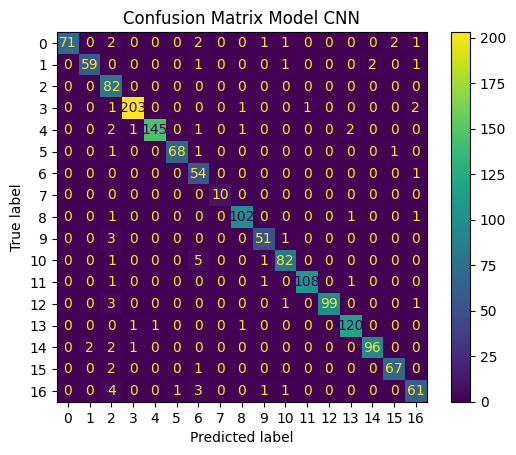

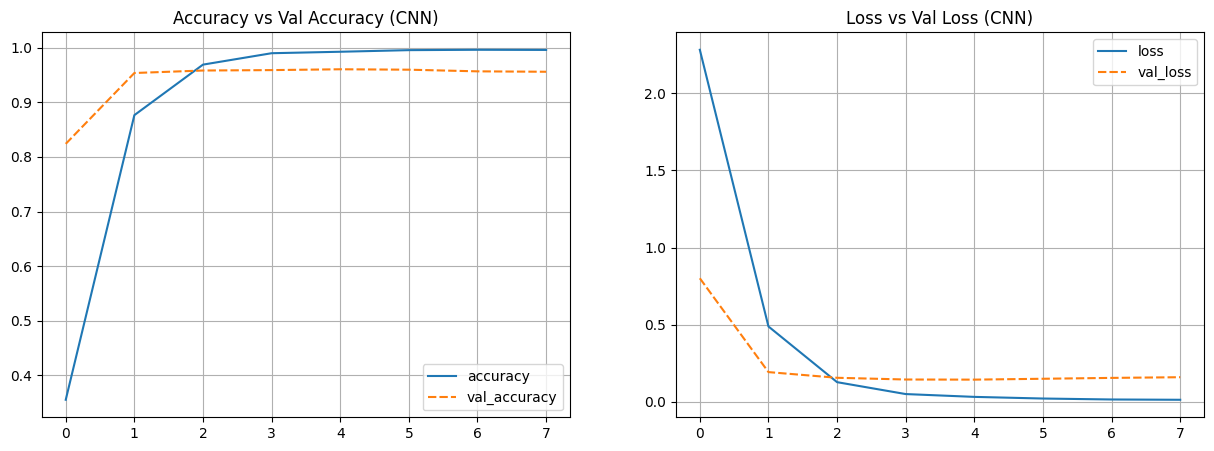

In [57]:
y_pred_cnn = np.argmax(model_cnn.predict(X_test_vec), axis=1)

y_test_encoded = to_categorical(y_test, num_classes=17)

print('\n', '-'*10, 'Classification Report Model CNN','-'*10, '\n')
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_cnn))

conf_matrix_cnn = metrics.confusion_matrix(y_test, y_pred_cnn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn)
cm_display.plot()
plt.title('Confusion Matrix Model CNN')
plt.show()

display(HTML('<center><b><h3>Grafik Akurasi dan Loss Model CNN</h3></b></center>'))
history_df = pd.DataFrame(history_cnn.history)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val Accuracy (CNN)')
plt.grid()
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Loss vs Val Loss (CNN)')
plt.grid()
plt.show()

**Insight:**

- Model menunjukkan peningkatan akurasi pelatihan (accuracy) dan akurasi validasi (val_accuracy) yang sangat cepat di awal epoch (epoch 0-1). Akurasi pelatihan dengan cepat mencapai 1.0 (100%) dan akurasi validasi mendekati 0.95 (95%).

- Akurasi pelatihan stabil di sekitar 1.0, menunjukkan model sangat baik dalam mempelajari data pelatihan. Akurasi validasi juga stabil di sekitar 0.95-0.96, menunjukkan kemampuan generalisasi yang sangat baik pada data yang belum pernah dilihat.

- Ada sedikit jarak (gap) antara akurasi pelatihan (mendekati 1.0) dan akurasi validasi (sekitar 0.95-0.96). Ini adalah indikasi overfitting yang ringan, di mana model sedikit lebih baik pada data yang sudah dilihat daripada data baru. Namun, ini adalah tingkat overfitting yang wajar dan sering terjadi pada model yang berkinerja tinggi.

****

- Loss pelatihan dan val_loss menurun dengan sangat cepat di epoch awal.

- Loss pelatihan mencapai nilai yang sangat rendah dan stabil (mendekati 0), sementara val_loss juga menurun dan stabil di nilai yang rendah (sekitar 0.15).

****

- Sebagian besar angka yang signifikan terkonsentrasi pada diagonal utama matriks (dari kiri atas ke kanan bawah). Ini menunjukkan bahwa model sebagian besar berhasil memprediksi label kelas yang benar untuk setiap true label.

- Prediksi Akurat per Kelas:
  - Sebagai contoh, untuk True label 0 (baris pertama), ada 71 sampel yang diprediksi dengan benar sebagai Predicted label 0.
  - Untuk True label 3, ada 203 sampel yang diprediksi benar sebagai Predicted label 3.
  - Untuk True label 4, ada 145 sampel yang diprediksi benar sebagai Predicted label 4.

- Meskipun secara keseluruhan sangat baik, ada beberapa kasus di mana model salah memprediksi:
  - True label 0 kadang diprediksi sebagai 1, 2, atau 16.
  - True label 1 kadang diprediksi sebagai 0.
  - True label 2 kadang diprediksi sebagai 0, 1, 3, 4, atau 5.
  - True label 16 kadang diprediksi sebagai 0, 3, 4, 5, 6, 11, atau 15.
  - Miskonsepsi ini mungkin terjadi pada bahasa-bahasa yang memiliki kemiripan linguistik tertentu atau pada sampel-sampel yang sangat pendek/ambigu.

 ****

- Model ini memiliki akurasi keseluruhan yang sangat tinggi, yaitu 95%, yang mengindikasikan kinerja klasifikasi yang sangat baik.

- Sebagian besar kelas menunjukkan nilai presisi, recall, dan F1-score yang sangat tinggi (di atas 0.90). Ini menunjukkan bahwa model tidak hanya memprediksi dengan benar, tetapi juga memiliki tingkat false positive dan false negative yang rendah untuk mayoritas bahasa.

- (rata-rata tanpa mempertimbangkan jumlah sampel) untuk presisi, recall, dan F1-score semuanya tinggi (0.95), menunjukkan performa yang seimbang di seluruh kelas.

-  (rata-rata dengan mempertimbangkan jumlah sampel) juga sangat tinggi (0.95-0.96), mengkonfirmasi performa keseluruhan yang luar biasa.

### **VIII.III. Misclassification Test Data**

49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 363ms/step


<ipython-input-58-5fae8b9ee39b>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-58-5fae8b9ee39b>:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from f

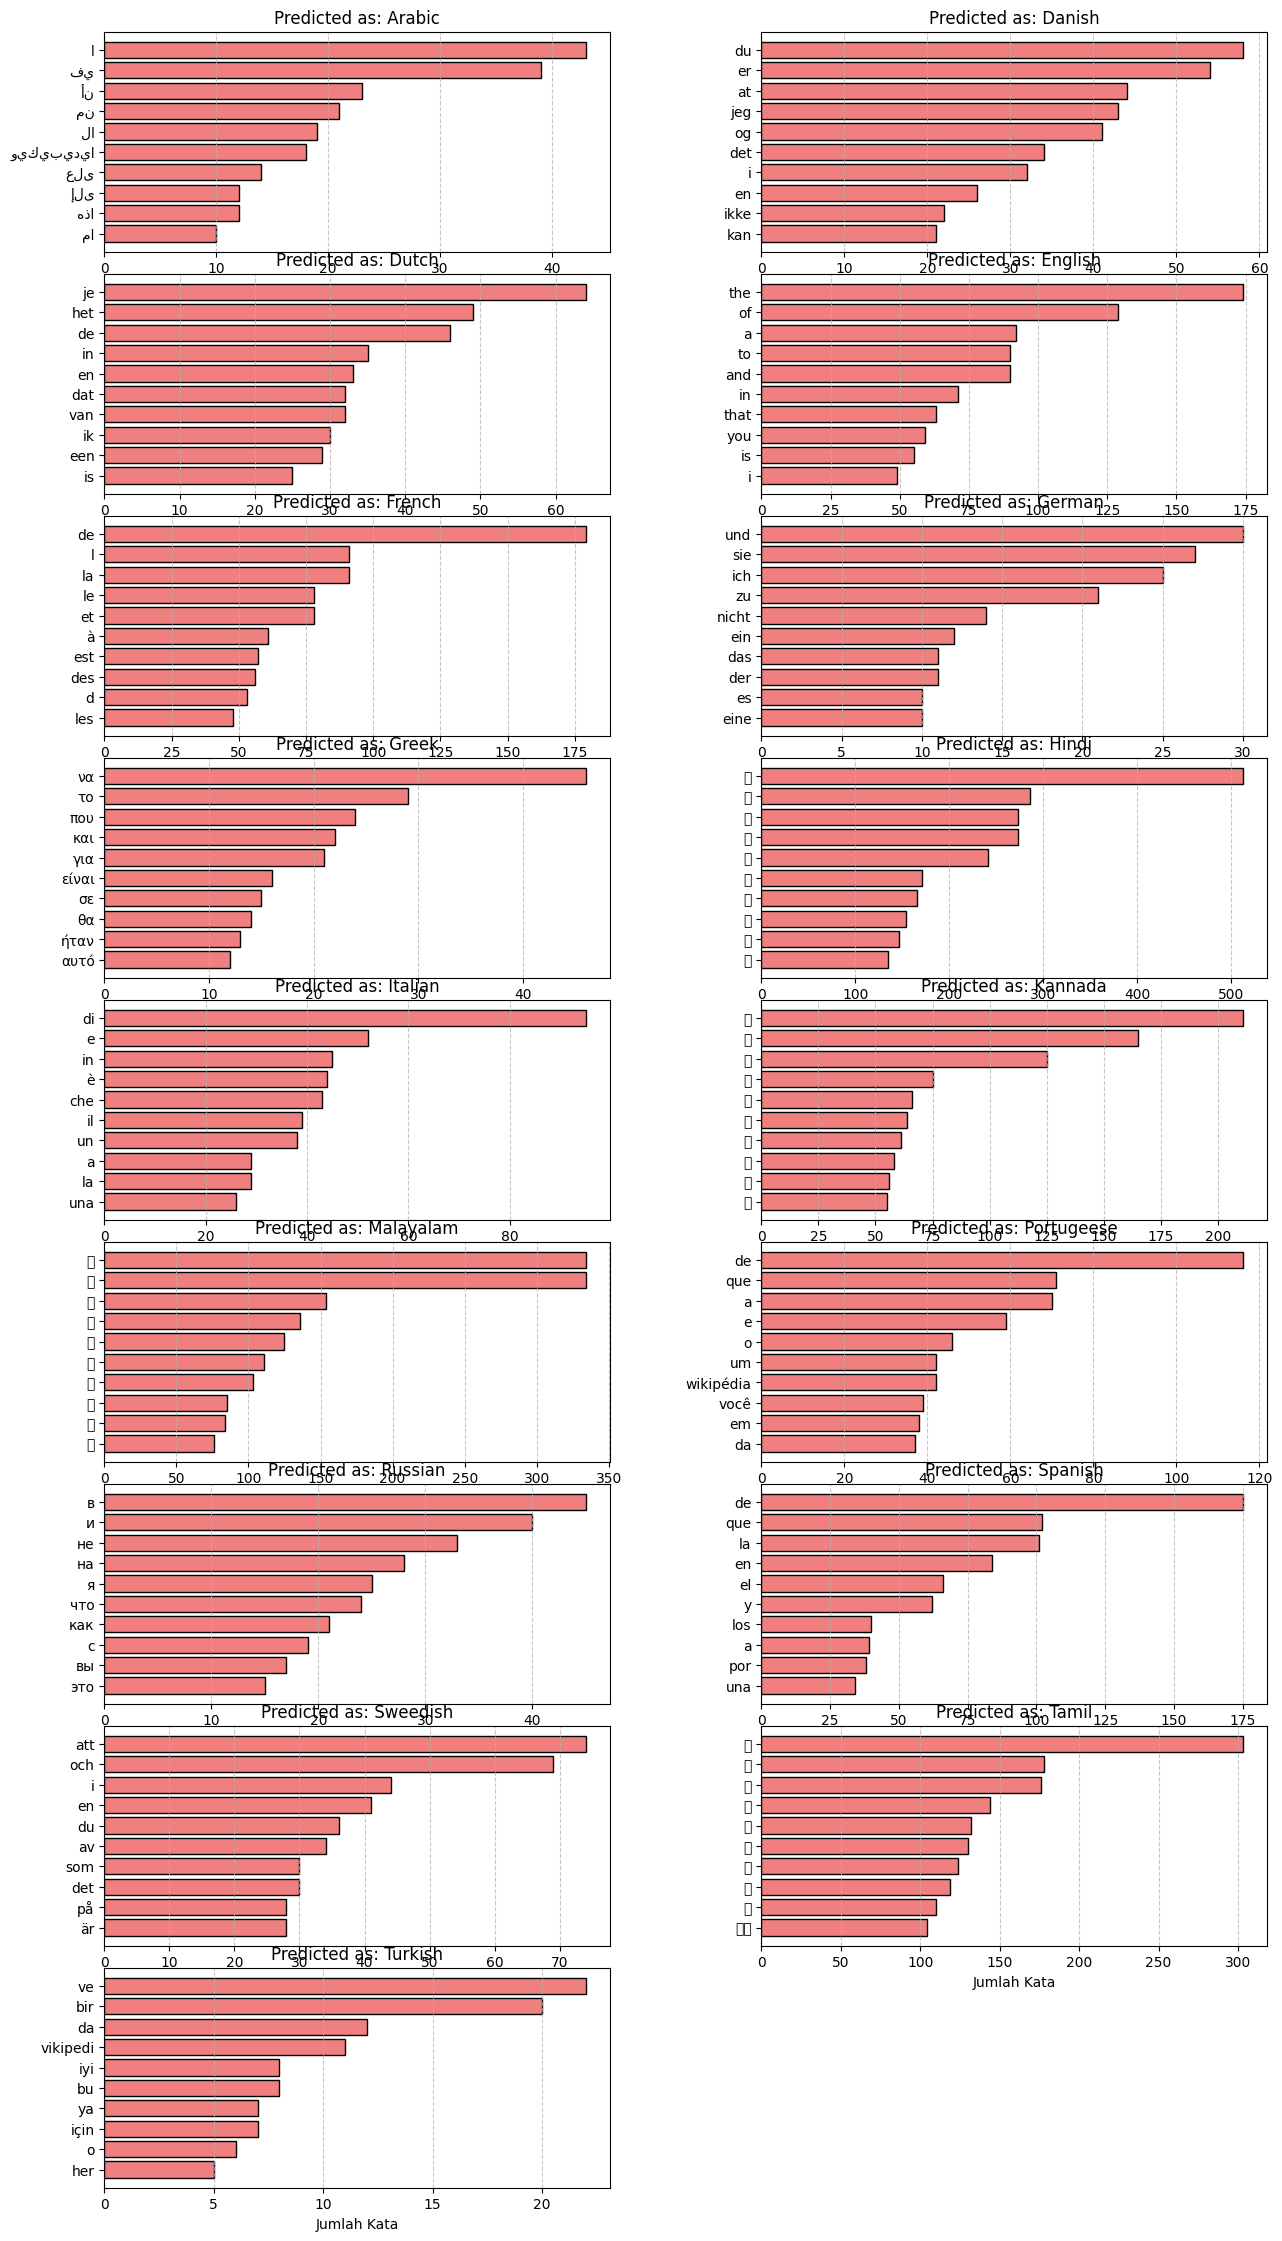

In [58]:
y_pred_cnn = np.argmax(model_cnn.predict(X_test_vec), axis=1)

y_pred_series_cnn = pd.Series(y_pred_cnn, name='pred')
y_test_series_cnn = pd.Series(y_test, name='label')

misclassified_df_cnn = pd.concat([X_test.reset_index(drop=True), y_test_series_cnn, y_pred_series_cnn], axis=1)
misclassified_df_cnn.columns = ['text', 'label', 'pred']

misclassified_df_cnn = misclassified_df_cnn[misclassified_df_cnn['label'] != misclassified_df_cnn['pred']]

fig = plt.figure(constrained_layout=True, figsize=(15, 28))
gs = GridSpec(9, 2, figure=fig, hspace=0.1, wspace=0.3)
axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(17)]
class_names = label_encoder.classes_

display(HTML('<center><b><h3>Kata yang Paling Sering Muncul pada Misklasifikasi (CNN)</h3></b></center>'))

for idx, (ax, label_name) in enumerate(zip(axes, class_names)):
    pred_list = misclassified_df_cnn[misclassified_df_cnn['pred'] == idx]['text'].tolist()

    words = [word.lower() for text in pred_list for word in re.findall(r'\w+', text)]

    if words:
        word_counts = pd.Series(words).value_counts().nlargest(10)
        ax.barh(word_counts.index[::-1], word_counts.values[::-1], color='lightcoral', edgecolor='black')
        ax.set_title(f'Predicted as: {label_name}')
        ax.set_xlabel('Jumlah Kata')
        ax.grid(axis='x', linestyle='--', alpha=0.7)
    else:
        ax.set_title(f'Predicted as: {label_name}')
        ax.text(0.5, 0.5, 'No misclassifications predicted as this class',
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=10, color='gray')

plt.tight_layout()
plt.show()

**Insight:**

- Bahasa Roman (French, Spanish, Portuguese, Italian) terdapat banyak kemiripan dalam kata-kata fungsi dan struktur (misalnya, penggunaan "de", "que", "la", "en", "a" yang umum). Ini adalah kelompok bahasa yang paling menantang untuk dibedakan hanya berdasarkan kata-kata frekuensi tinggi. Model kemungkinan besar harus mengandalkan kombinasi n-gram karakter dan sedikit konteks untuk membedakan nuansa antara bahasa-bahasa ini.

- Bahasa Germanik (English, Dutch, German, Danish, Sweedish) juga ada beberapa kemiripan, meskipun tidak sekuat bahasa Roman. Kata-kata seperti "the/de/der/det", "and/en/und/og", "in/i" menunjukkan akar linguistik yang sama.

- Grafik-grafik ini secara visual mengkonfirmasi bahwa model deteksi bahasa kemungkinan besar mengandalkan frekuensi dan pola n-gram dari kata-kata fungsi dan karakteristik skrip/karakter unik untuk membedakan antar bahasa.

## **IX. Model Saving**

In [8]:
# === PENYIMPANAN MODEL ===
model_cnn.save('cnn_model.h5')

# === PENYIMPANAN TEXT VECTORIZER ===
# Simpan konfigurasi TextVectorization
text_vectorizer_config = text_vectorization.get_config()
text_vectorizer_vocab = text_vectorization.get_vocabulary()

# Simpan konfigurasi ke dalam file JSON
with open('text_vectorizer_config.json', 'w') as f:
    json.dump(text_vectorizer_config, f)

# Simpan daftar vocab ke file TXT
with open('text_vectorizer_vocab.txt', 'w') as f:
    f.write('\n'.join(text_vectorizer_vocab))

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

## **X. Conclusion**

**Model yang dipilih yaitu CNN dengan memiliki akurasi keseluruhan yang sangat tinggi, yaitu 95%. Sebagian besar kelas menunjukkan nilai presisi, recall, dan F1-score yang sangat tinggi di atas 0.90.**